## Spectral changes of EEG following a 6-week low-dose oral ketamine treatment in adults with major depressive disorder and chronic suicidality

Created by Toomas Erik Anijärv in 16.09.2022 (edited in 01.12.2022)

This notebook is a representation of EEG processing done for the publication with one of the participants as an example.

You are free to use this or any other code from this repository for your own projects and publications. Citation or reference to the repository is not required, but would be much appreciated (see more on README.md).

In [1]:
import mne, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#mne.set_log_level('error')

# Set the current working directory to be the project main folder
os.chdir('/Users/tanijarv/Documents/GitHub/EEG-pipeline-TI')

import basic.arrange_data as arrange
import signal_processing.pre_process as pre_process
import signal_processing.spectral_analysis as spectr

**Locating the EEG files in folders** by define the experiment sub-folder (`exp_folder`), folder with raw EEG files (`raw_folder`), folder for exporting clean EEG files (`clean_folder`), and folder for exporting the results (`results_folder`).

During pre-processing, all the raw EEG files are cleaned from the `raw_folder/exp_folder` and later saved to `clean_folder/exp_folder`. For analysis, the same clean files are read in and worked on until the results are exported to `results_folder/exp_folder`.

In [2]:
### DEFINE ###
raw_folder = 'Data/Raw/'
clean_folder = 'Data/Clean/'
results_folder = 'Results/'

exp_folder = 'OKTOS/Eyes Closed/Baseline'
exp_condition = 'EC_00'

### PRE-PROCESSING

**Pre-processing** within this study includes initially reading the raw EEG files from `raw_folder/exp_folder`, setting montage (`biosemi32`), re-referencing the signals to `mastoid`, cropping the EEG signal to include only the `resting` part.

Furthermore, `0.5-30 Hz FIR filter` is designed (`zero-phase, Hamming window, order 6578`) and EOG channels are used to remove EOG-related noise with `signal-space projections (SSP)` as method.

Finally, artefacts are rejected with Autoreject package by removing epochs which exceed the global thereshold voltage level (`global AR`) and rest of the artefactual epochs are either removed or interpreted with `local AR`.

The clean EEG signals are exported to `clean_folder/exp_folder`.

In [3]:
### DEFINE ###
montage = 'biosemi32'
eog_channels = ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'] # EOG channels + mastoids
stimulus_channel = 'Status'
reference = ['EXG1', 'EXG2'] # mastoid channels as reference
epochs_duration = 5
filter_design = dict(l_freq=0.5,h_freq=30,filter_length='auto',method='fir',
                     l_trans_bandwidth='auto',h_trans_bandwidth='auto',
                     phase='zero',fir_window='hamming',fir_design='firwin')

# Set the directory in progress and find all BDF (raw EEG) files in there
dir_inprogress = os.path.join(raw_folder,exp_folder)
export_dir = os.path.join(clean_folder,exp_folder)
file_dirs, subject_names = arrange.read_files(dir_inprogress,'.bdf')

Files in Data/Raw/OKTOS/Eyes Closed/Baseline read in: 1


Extracting EDF parameters from /Users/tanijarv/Documents/GitHub/EEG-pipeline-TI/Data/Raw/OKTOS/Eyes Closed/Baseline/OKTOS_0002_00A_EC.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 275455  =      0.000 ...   268.999 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
3 events found
Event IDs: [1 2 8]
Event markers are following:
[[ 25405      0      1]
 [ 25507      0      8]
 [271178      0      2]]
Starting point: 24.8095703125 s
Ending point: 264.822265625 s
Total duration: 240.0126953125 s
---
APPLYING FILTER

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


---
APPLYING SSP FOR EOG-REMOVAL

Running EOG SSP computation
Using EOG channels: EXG1, EXG2, EXG3, EXG4, EXG5, EXG6, EXG7, EXG8
EOG channel index for this subject is: [32 33 34 35 36 37 38 39]
Filtering the data to remove DC offset to help distinguish blinks from saccades


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.2s finished


Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10240 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 3 significant peaks
Number of EOG events detected: 3
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
3 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3 events and 411 original time points ...
0 bad epochs dropped
Adding projection: eeg--0.200-0.200-PCA-01
Done.
1 projection items deactivated
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
---
DIVIDING INTO EPOCHS

Not setting metadata
48 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 48 events and 5120 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished


---
EPOCHS BEFORE AR



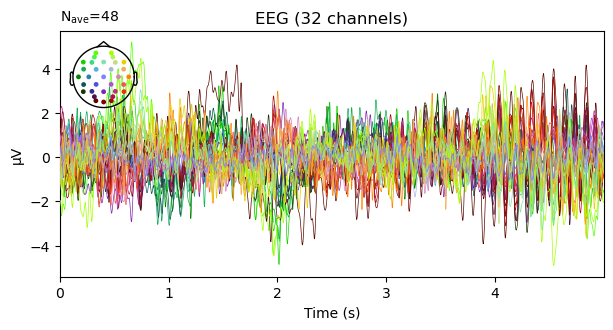

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


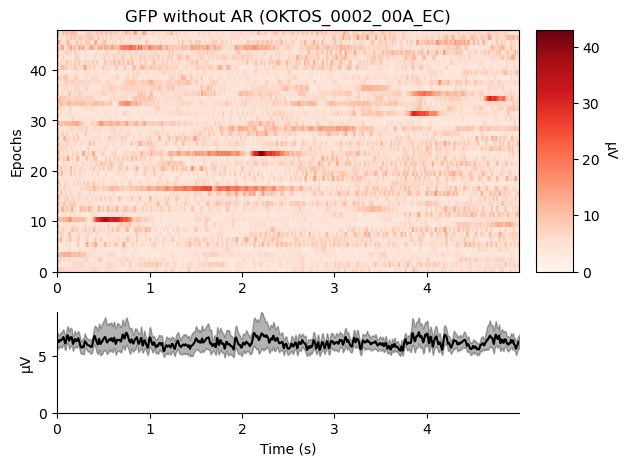

---
APPLYING GLOBAL AR

Estimating rejection dictionary for eeg
Dropping epochs with rejection threshold: {'eeg': 9.087389550469646e-05}
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'FC5']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['F7', 'FC5']
9 bad epochs dropped
---
APPLYING LOCAL AR

Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/39 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/39 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/39 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/39 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=1.00 and n_interpolate=31


  0%|          | Repairing epochs : 0/39 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


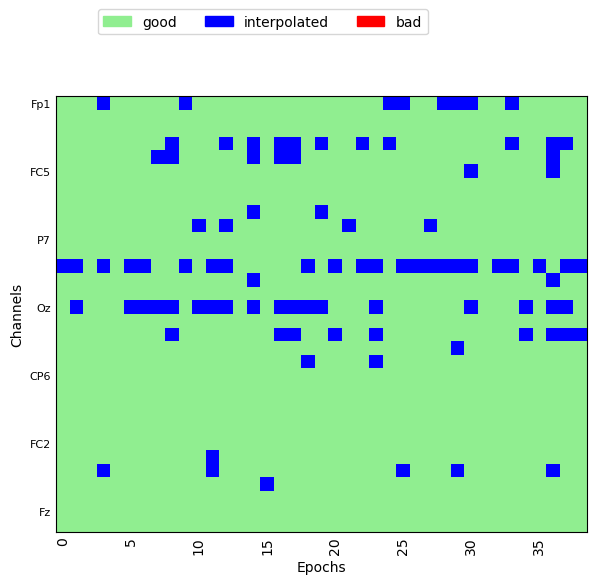

---
EPOCHS AFTER AR



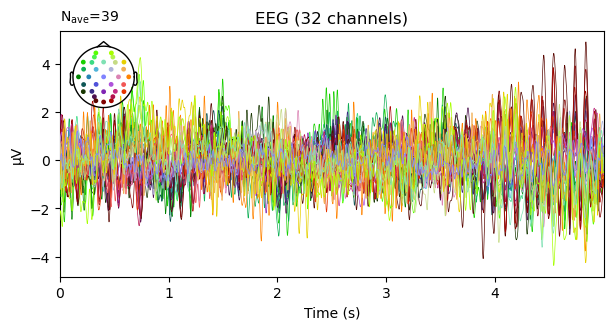

Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


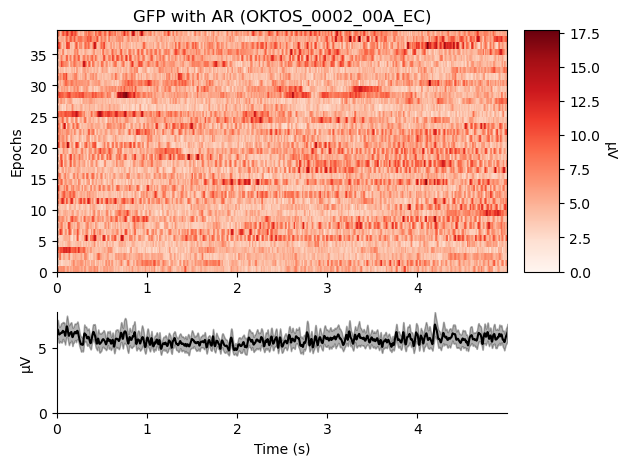

Overwriting existing file.


In [4]:
for i in range(len(file_dirs)):
    # Read in the raw EEG data
    raw = mne.io.read_raw_bdf(file_dirs[i], infer_types=True, eog=eog_channels,
                              stim_channel=stimulus_channel)

    # Set the right montage (Biosemi32) and set reference as average across all channels
    raw = raw.set_montage(mne.channels.make_standard_montage(montage)).load_data()\
             .set_eeg_reference(ref_channels=reference, verbose=True)

    # Find event markers for the start and end of resting state recordings
    events = mne.find_events(raw, stim_channel=stimulus_channel, consecutive=False, output='offset')
    tminmax = [events[0][0]/raw.info['sfreq'], events[-1][0]/raw.info['sfreq']]

    # Use the markers to crop to EEG signal to leave only the actual resting state
    cropped_raw = raw.crop(tmin=tminmax[0], tmax=tminmax[1])
    cropped_raw = cropped_raw.drop_channels(stimulus_channel)
    print(('Event markers are following:\n{}\nStarting point: {} s\nEnding point: {} s\n'
           'Total duration: {} s').format(events, tminmax[0], tminmax[1], tminmax[1]-tminmax[0]))
    
    # Filter the signal with bandpass filter and remove EOG artefacts with SSP
    filt = pre_process.filter_raw_data(cropped_raw, filter_design, line_remove=None,
                                       eog_channels=eog_channels, plot_filt=False, savefig=False)

    # Divide the filtered signal to epochs and run Autoreject artefact rejection on the epochs
    %matplotlib inline
    epochs = pre_process.artefact_rejection(filt,subject_names[i],epo_duration=epochs_duration)

    # (Optional) for displaying interactive EEG plots to visually inspect the signal quality
    #%matplotlib qt
    #epochs.plot(n_channels=32,n_epochs=1)

    # Try to create a directory and save the EEG file to that directory
    try:
        os.makedirs(export_dir)
    except FileExistsError:
        pass
    try:
        mne.Epochs.save(epochs,fname='{}/{}_clean-epo.fif'.format(export_dir,subject_names[i]),
                                                                  overwrite=True)
    except FileExistsError:
        pass

### SPECTRAL BANDPOWER ANALYSIS

**Spectral analysis** within this study includes estimating `Welch's power spectrum density (PSD)` for all the participants at four brain regions (i.e., `frontal`, `temporal`, `centro-parietal`, and `occipital`). The PSD estimates are divided to five frequency bands - `delta (1-3.9 Hz)`, `theta (4-7.9 Hz)`, `alpha (8-12 Hz)`, `low-beta (12.1-18 Hz)`, and `high-beta (18.1-30 Hz)`.

Welch's PSD is calculated for `1-30 Hz` frequency range using `2-second Hamming window (50% overlap)` and 3 times the window (6 seconds) zero-padding.

The band powers are checked for difference along the signal (i.e., resting state power spectra should not be changing in time too much) and if median absolute deviation (MAD) of the band powers along first half of the signal compared to the second half is over 2 (`MAD>=2`), the warning in logged. That is the reason, the study did not include delta band in the analysis as the MAD was larger than 2 in many cases. The process takes place in `bandpower_per_channel` and `signal_quality_check` functions.

The results are saved as Excel spreadsheets (channel-by channel and regionally) to `results_folder/exp_folder`.

In [5]:
### DEFINE ###
b_names = ['Delta', 'Theta', 'Alpha', 'Low-beta', 'High-beta']
b_freqs = [[1, 3.9], [4, 7.9], [8, 12], [12.1, 18], [18.1, 30]]
brain_regions = {'Frontal' : ['AF3', 'Fp1', 'F7', 'F3', 'AF4', 'Fp2', 'F8', 'F4', 'Fz'],
                 'Temporal' : ['FC5', 'T7', 'CP5', 'P7', 'FC6', 'T8', 'CP6', 'P8'],
                 'Centro-parietal' : ['FC1', 'C3', 'Cz', 'CP1', 'P3', 'Pz', 'FC2', 'C4', 'CP2', 'P4'],
                 'Occipital' : ['PO3', 'O1', 'Oz', 'PO4', 'O2']}
psd_params = dict(method='welch', fminmax=[1, 30], window='hamming', window_duration=2,
                  window_overlap=0.5, zero_padding=3)

# Set the directory in progress and find all FIF (clean EEG) files in there
dir_inprogress = os.path.join(clean_folder, exp_folder)
file_dirs, subject_names = arrange.read_files(dir_inprogress, '_clean-epo.fif')

Files in Data/Clean/OKTOS/Eyes Closed/Baseline read in: 1


---
PSD (welch) calculation

<Power Spectrum (from Epochs, welch method) | 39 epochs × 32 channels × 233 freqs, 1.0-30.0 Hz>
Window type: hamming
Window size: 2048
Overlap: 1024
Zero-padding: 6144

Samples per segment: 2048
Samples for FFT: 8192
Frequency resolution: 0.125 Hz


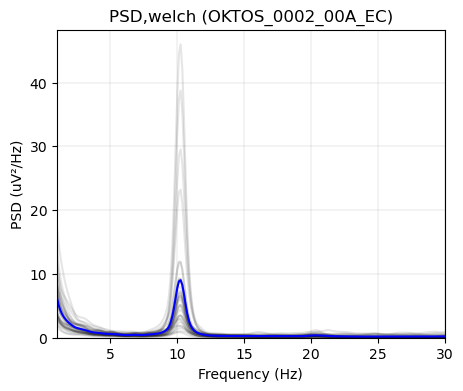

Finding bandpower within [1, 3.9] Hz with Ln normalisation set to False
Finding bandpower within [4, 7.9] Hz with Ln normalisation set to False
Finding bandpower within [8, 12] Hz with Ln normalisation set to False
Finding bandpower within [12.1, 18] Hz with Ln normalisation set to False
Finding bandpower within [18.1, 30] Hz with Ln normalisation set to False
---
Regional absolute powers in Delta band


,Frontal,Temporal,Centro-parietal,Occipital
Subject,,,,
OKTOS_0002_00A_EC,3.165227,2.378568,1.216126,1.847628


---
Regional absolute powers in Theta band


,Frontal,Temporal,Centro-parietal,Occipital
Subject,,,,
OKTOS_0002_00A_EC,0.681174,0.603739,0.296787,0.518001


---
Regional absolute powers in Alpha band


,Frontal,Temporal,Centro-parietal,Occipital
Subject,,,,
OKTOS_0002_00A_EC,2.248555,1.856207,1.057957,7.880533


---
Regional absolute powers in Low-beta band


,Frontal,Temporal,Centro-parietal,Occipital
Subject,,,,
OKTOS_0002_00A_EC,0.289156,0.385168,0.129947,0.316835


---
Regional absolute powers in High-beta band


,Frontal,Temporal,Centro-parietal,Occipital
Subject,,,,
OKTOS_0002_00A_EC,0.23514,0.372202,0.086864,0.201645


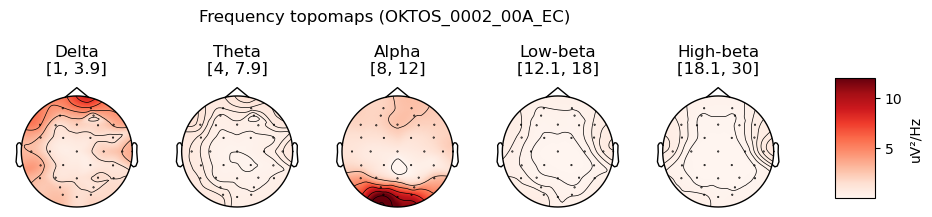

In [6]:
for i in range(len(file_dirs)):
    # Read in the clean EEG data
    epochs = mne.read_epochs(fname='{}/{}_clean-epo.fif'.format(dir_inprogress, subject_names[i]),
                                                                verbose=False)
    
    # Calculate Welch's power spectrum density
    [psds,freqs] = spectr.calculate_psd(epochs, subject_names[i], **psd_params,
                                        verbose=True, plot=True)
    
    # Find power for all bands and add to dataframe including the previous subjects
    for j in range(len(b_names)):
        if i == 0:
            globals()["df_psd_"+b_names[j]] = pd.DataFrame()
        if j == 0:
            vlim = [float('inf'), 0]
        
        # Devide the PSD to frequency band bins and calculate absolute bandpowers incl. signal quality check
        globals()["psd_ch_"+b_names[j]] = spectr.bandpower_per_channel(psds, freqs, b_freqs[j],
                                                                       b_names[j], subject_names[i],
                                                                       epochs)

        # Convert the array to dataframe and concatenate it to dataframe including the previous subjects
        globals()["temp_df_psd_"+b_names[j]] = arrange.array_to_df(subject_names[i], epochs,
                                                                   globals()["psd_ch_"+b_names[j]])
        globals()["df_psd_"+b_names[j]] = pd.concat([globals()["df_psd_"+b_names[j]],
                                                     globals()["temp_df_psd_"+b_names[j]]])

        # Save the minimum and maximum PSD values as an integer for later colorbar use
        vlim[0] = min([vlim[0], min(globals()["psd_ch_"+b_names[j]])])
        vlim[1] = max([vlim[1], max(globals()["psd_ch_"+b_names[j]])])

    # Plot topomaps for all bands
    fig, axs = plt.subplots(nrows=1, ncols=len(b_names), figsize=(10, 3), dpi=100)
    fig.suptitle("Frequency topomaps ({})".format(subject_names[i]))
    for topo in range(len(b_names)):
        im, _ = mne.viz.plot_topomap(globals()["psd_ch_"+b_names[topo]], epochs.info, axes=axs[topo],
                                     vlim=vlim, show=False)
        axs[topo].set_title(b_names[topo]+'\n'+str(b_freqs[topo]))
    cbar_ax = fig.add_axes([0.95,0.35,0.04,0.4])
    clb = fig.colorbar(im, cax=cbar_ax)
    clb.ax.set_ylabel('uV\u00b2/Hz')

# Pre-create results folders for spectral analysis data
arrange.create_results_folders(exp_folder=exp_folder, results_folder=results_folder, abs_psd=True)

for band in b_names:
    # Save the PSD values for each channel for each band in Excel format
    globals()["df_psd_"+band].to_excel('{}/{}/Absolute PSD/channels/{}_psd_{}.xlsx'.format(results_folder,
                                                                                           exp_folder,
                                                                                           exp_condition,
                                                                                           band))

    # Find regional band powers and display and save them to Excel
    df_psd_band_reg = arrange.df_channels_to_regions(globals()["df_psd_"+band], brain_regions)
    df_psd_band_reg.to_excel('{}/{}/Absolute PSD/regions/{}_psd_{}.xlsx'.format(results_folder, exp_folder,
                                                                                exp_condition, band))
    print('---\nRegional absolute powers in {} band'. format(band))
    display(df_psd_band_reg.head())